# UBER data analysis from NYC

### We have 12 files in parquet format with each file pertaining to data of a particular month like Jan, Feb. Each file is 300 MB(approximate size). Therefore total file size is around 3.6GB.

### We imported individual data and then combined them into single dataframe using 'union'.

In [0]:
from pyspark.sql.functions import hour, avg
from pyspark.sql.functions import month, count, round, sum
from pyspark.sql.window import Window

In [0]:
# File location and type
file_location = "/FileStore/tables/fhvhv_tripdata_2021_01.parquet"
file_location2 = "/FileStore/tables/fhvhv_tripdata_2021_02.parquet"
file_location3 = "/FileStore/tables/fhvhv_tripdata_2021_03.parquet"
file_location4 = "/FileStore/tables/fhvhv_tripdata_2021_04.parquet"
file_location5 = "/FileStore/tables/fhvhv_tripdata_2021_05.parquet"
file_location6 = "/FileStore/tables/fhvhv_tripdata_2021_06.parquet"
file_location7 = "/FileStore/tables/fhvhv_tripdata_2021_07.parquet"
file_location8 = "/FileStore/tables/fhvhv_tripdata_2021_08.parquet"
file_location9 = "/FileStore/tables/fhvhv_tripdata_2021_09.parquet"
file_location10 = "/FileStore/tables/fhvhv_tripdata_2021_10.parquet"
file_location11 = "/FileStore/tables/fhvhv_tripdata_2021_11.parquet"
file_location12 = "/FileStore/tables/fhvhv_tripdata_2021_12.parquet"



file_type='parquet'
df1=spark.read.parquet(file_location, header=True, inferSchema=True)
df2=spark.read.parquet(file_location2, header=True, inferSchema=True)
df3=spark.read.parquet(file_location3, header=True, inferSchema=True)
df4=spark.read.parquet(file_location4, header=True, inferSchema=True)
df5=spark.read.parquet(file_location5, header=True, inferSchema=True)
df6=spark.read.parquet(file_location6, header=True, inferSchema=True)
df7=spark.read.parquet(file_location7, header=True, inferSchema=True)
df8=spark.read.parquet(file_location8, header=True, inferSchema=True)
df9=spark.read.parquet(file_location9, header=True, inferSchema=True)
df10=spark.read.parquet(file_location10, header=True, inferSchema=True)
df11=spark.read.parquet(file_location11, header=True, inferSchema=True)
df12=spark.read.parquet(file_location12, header=True, inferSchema=True)

In [0]:
 df1.show(truncate=False)

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|request_datetime   |on_scene_datetime  |pickup_datetime    |dropoff_datetime   |PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls|bcf |sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [0]:
# shape of first dataframe is 11908468 rows and 24 columns.

print((df1.count(), len(df1.columns)))

(11908468, 24)


In [0]:
# combining all the 12 datasets into one dataframe
# we created a dataframe with the data of one year.
df=df1.union(df2).union(df3).union(df4).union(df5).union(df6).union(df7).union(df8).union(df9).union(df10).union(df11).union(df12)

In [0]:
# Showing combined dataframe with rows from all the 12 datasets
df.show()

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [0]:
# we can see that concatenated dataframe 'df' has 174596652 (17.45 crores) rows and 24 columns.
print((df.count(), len(df.columns)))

(174596652, 24)


In [0]:
df.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: timestamp (nullable = true)
 |-- on_scene_datetime: timestamp (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_time: long (nullable = true)
 |-- base_passenger_fare: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- bcf: double (nullable = true)
 |-- sales_tax: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- driver_pay: double (nullable = true)
 |-- shared_request_flag: string (nullable = true)
 |-- shared_match_flag: string (nullable = true)
 |-- access_a_ride_flag: string (nul

In [0]:
# removing columns from the dataframe that are not used in this analysis

#df=df.drop("base_passenger_fare","tolls","bcf","sales_tax","congestion_surcharge","airport_fee","tips","driver_pay")

In [0]:
df.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: timestamp (nullable = true)
 |-- on_scene_datetime: timestamp (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_time: long (nullable = true)
 |-- base_passenger_fare: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- bcf: double (nullable = true)
 |-- sales_tax: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- driver_pay: double (nullable = true)
 |-- shared_request_flag: string (nullable = true)
 |-- shared_match_flag: string (nullable = true)
 |-- access_a_ride_flag: string (nul

In [0]:
# after removing the unused columns, we now have our dataframe with 16 columns

print((df.count(), len(df.columns)))

(174596652, 24)


In [0]:
# dropping all the rows containing any null values

df=df.na.drop()

In [0]:
# shape of dataframe after dropping the rows with null values 
#dont run this, it is taking long time

#print((df.count(), len(df.columns)))

(126167162, 16)


In [0]:
#df.summary()

### Number of users requesting Wheelchair accessible vehicle.

In [0]:
#Passenger requesting wheelchair accessible vehicle.
# We can see that 0.2% rides were requested with wheelchair accessible vehicle

df.groupBy('wav_request_flag').count().show()

+----------------+--------+
|wav_request_flag|   count|
+----------------+--------+
|               N|99666826|
|               Y|  188244|
+----------------+--------+



### Number of rides requested on hourly basis

In [0]:
# group the rows by hour and count the number of rows in each hour
df.groupBy(hour("request_datetime")).count().show()

+----------------------+-------+
|hour(request_datetime)|  count|
+----------------------+-------+
|                    12|4577598|
|                    22|5195692|
|                     1|2572318|
|                    13|4742763|
|                    16|5420211|
|                     6|2564032|
|                    20|5478042|
|                     5|1592743|
|                    19|5906968|
|                    15|5264973|
|                     9|4451547|
|                    17|5809438|
|                     8|4560976|
|                    23|4608905|
|                     7|3811375|
|                    10|4330129|
|                    21|5294298|
|                    11|4414223|
|                    14|5127962|
|                     0|3560119|
+----------------------+-------+
only showing top 20 rows



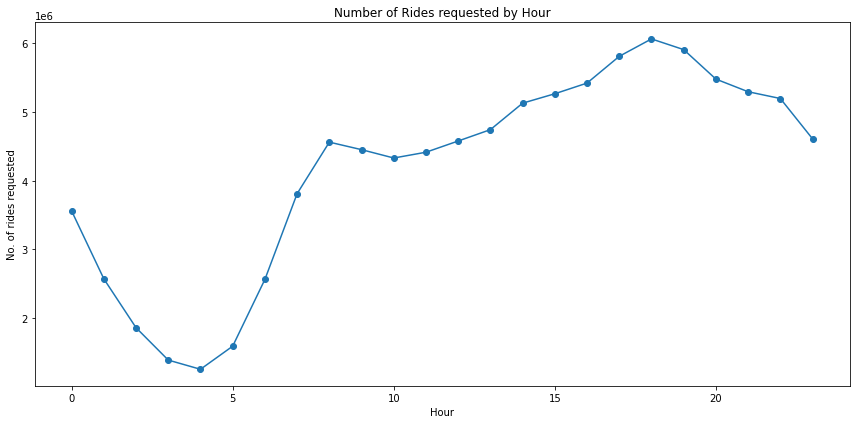

In [0]:
import matplotlib.pyplot as plt

# Grouping the rows by hour and counting the number of rows in each hour
count_df = df.groupBy(hour("request_datetime").alias("hour")).agg(count("*").alias("count"))

# Converting the PySpark DataFrame to a Pandas DataFrame and sorting by hour
pandas_df = count_df.toPandas().sort_values("hour")


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(pandas_df["hour"], pandas_df["count"], marker='o')
ax.set_title("Number of Rides requested by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("No. of rides requested")
plt.tight_layout()
plt.show()


### Number of rides requested on monthly basis

In [0]:
# grouping the rows by month and counting the number of rows in each month
df.groupBy(month("request_datetime").alias("month")).agg(count("*").alias("count")).show()

+-----+--------+
|month|   count|
+-----+--------+
|   12|11804976|
|    1| 8703005|
|    2| 8294779|
|    3|10174239|
|    4|10243004|
|    5|10812106|
|    6|10751250|
|    7|10709523|
|    8|10199226|
|    9|10561787|
|   10|12090988|
|   11|11822279|
+-----+--------+



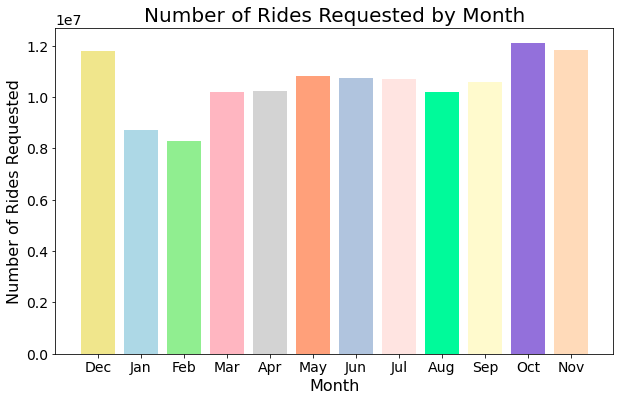

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# grouping the rows by month and counting the number of rows in each month
count_df = df.groupBy(month("request_datetime").alias("month")).agg(count("*").alias("count"))

# converting the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = count_df.toPandas()

plt.figure(figsize=(10, 6))
plt.rcParams.update({'font.size': 14})

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pandas_df["month"] = pandas_df["month"].map(lambda x: month_names[x-1])
colors = ['#F0E68C', '#ADD8E6', '#90EE90', '#FFB6C1', '#D3D3D3', '#FFA07A', '#B0C4DE', '#FFE4E1', '#00FA9A', '#FFFACD', '#9370DB', '#FFDAB9']
plt.bar(pandas_df["month"], pandas_df["count"], color=colors)
plt.title("Number of Rides Requested by Month", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of Rides Requested", fontsize=16)
plt.show()


### Seasonwise Requested Rides

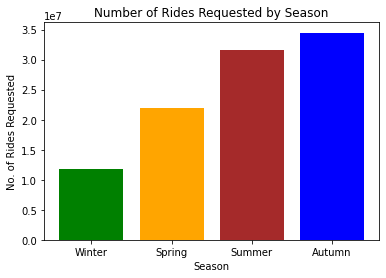

In [0]:
from pyspark.sql.functions import month, udf
from pyspark.sql.types import StringType
import matplotlib.pyplot as plt

season_mapping = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Autumn",
    10: "Autumn",
    11: "Autumn",
    12: "Winter"
}
get_season = udf(lambda month: season_mapping[month], StringType())
df_with_season = df.withColumn("season", get_season(month("request_datetime")))


# Group the rows by season and count the number of rows in each season
count_df = df_with_season.groupBy("season").count()
pandas_df = count_df.toPandas()
season_order = ["Spring", "Summer", "Autumn", "Winter"]

# Plotting the bar chart
plt.bar(pandas_df["season"], pandas_df["count"], color=["green", "orange", "brown", "blue"])
plt.title("Number of Rides Requested by Season")
plt.xlabel("Season")
plt.ylabel("No. of Rides Requested")
plt.xticks(season_order)
plt.show()


##       *October is the month and Autumn is the season with highest number of rides*

### Average trip time month wise

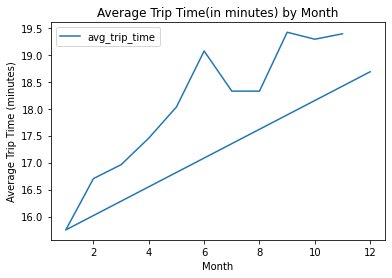

In [0]:
# grouping the rows by month and calculating the average trip time
avg_time_df = df.groupBy(month("request_datetime").alias("month")).agg(avg("trip_time").alias("avg_trip_time"))
pandas_df = avg_time_df.toPandas()

pandas_df['avg_trip_time']= (pandas_df['avg_trip_time']/60)

ax = pandas_df.plot(x="month", y="avg_trip_time", kind="line")
ax.set_xlabel("Month")
ax.set_ylabel("Average Trip Time (minutes)")
ax.set_title("Average Trip Time(in minutes) by Month")
plt.show()


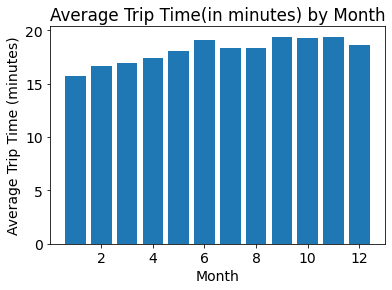

In [0]:
# grouping the rows by month and calculating the average trip time
avg_time_df = df.groupBy(month("request_datetime").alias("month")).agg(avg("trip_time").alias("avg_trip_time"))

pandas_df = avg_time_df.toPandas()
pandas_df['avg_trip_time']= (pandas_df['avg_trip_time']/60)

plt.bar(pandas_df["month"], pandas_df["avg_trip_time"])
plt.title("Average Trip Time(in minutes) by Month")
plt.xlabel("Month")
plt.ylabel("Average Trip Time (minutes)")
plt.show()


### Average trip miles month wise

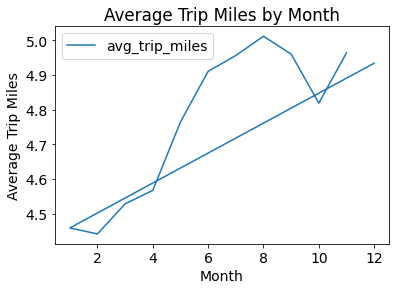

In [0]:
# grouping the rows by month and calculating the average trip time
avg_time_df = df.groupBy(month("request_datetime").alias("month")).agg(avg("trip_miles").alias("avg_trip_miles"))
pandas_df = avg_time_df.toPandas()

# plotting the line graph
ax = pandas_df.plot(x="month", y="avg_trip_miles", kind="line")
ax.set_xlabel("Month")
ax.set_ylabel("Average Trip Miles")
ax.set_title("Average Trip Miles by Month")
plt.show()


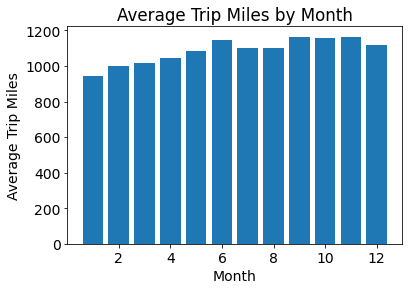

In [0]:
# grouping the rows by month and calculatting the average trip time
avg_time_df = df.groupBy(month("request_datetime").alias("month")).agg(avg("trip_time").alias("avg_trip_miles"))

pandas_df = avg_time_df.toPandas()


# plotting the bar chart
plt.bar(pandas_df["month"], pandas_df["avg_trip_miles"])
plt.title("Average Trip Miles by Month")
plt.xlabel("Month")
plt.ylabel("Average Trip Miles")
plt.show()


### Company delay
#### -> Lets see the delay between the time a ride has been requested and the time the ride has actually arrived.
- Hour wise
- Dispatching Base Number wise

##### Hour wise

In [0]:
from pyspark.sql.functions import col, expr

hourly_delay_df = df.withColumn("company_delay", expr("on_scene_datetime - request_datetime")) \
    .groupBy(hour("request_datetime").alias("hour")) \
    .agg(avg("company_delay").alias("avg_company_delay"))

hourly_delay_df.show()

+----+--------------------+
|hour|   avg_company_delay|
+----+--------------------+
|  12|INTERVAL '0 00:04...|
|  22|INTERVAL '0 00:05...|
|   1|INTERVAL '0 00:04...|
|  13|INTERVAL '0 00:04...|
|  16|INTERVAL '0 00:04...|
|   6|INTERVAL '0 00:04...|
|  20|INTERVAL '0 00:04...|
|   5|INTERVAL '0 00:04...|
|  19|INTERVAL '0 00:04...|
|  15|INTERVAL '0 00:04...|
|   9|INTERVAL '0 00:03...|
|  17|INTERVAL '0 00:04...|
|   8|INTERVAL '0 00:04...|
|  23|INTERVAL '0 00:05...|
|   7|INTERVAL '0 00:04...|
|  10|INTERVAL '0 00:03...|
|  21|INTERVAL '0 00:04...|
|  11|INTERVAL '0 00:03...|
|  14|INTERVAL '0 00:04...|
|   0|INTERVAL '0 00:04...|
+----+--------------------+
only showing top 20 rows



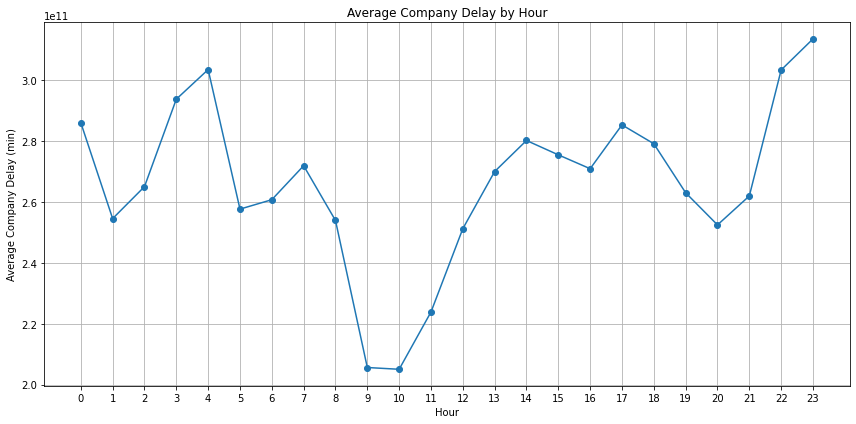

In [0]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
pandas_hourly_delay_df = hourly_delay_df.toPandas()
pandas_hourly_delay_df = pandas_hourly_delay_df.sort_values("hour")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(pandas_hourly_delay_df["hour"], pandas_hourly_delay_df["avg_company_delay"], marker="o", linestyle="-")
ax.set_title("Average Company Delay by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Average Company Delay (min)")
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
ax.grid(True)
plt.tight_layout()
plt.show()


In [0]:
dispatching_base_delay_df = df.withColumn("company_delay", expr("on_scene_datetime - request_datetime")) \
    .groupBy("dispatching_base_num") \
    .agg(avg("company_delay").alias("avg_company_delay"))

dispatching_base_delay_df.show()


+--------------------+--------------------+
|dispatching_base_num|   avg_company_delay|
+--------------------+--------------------+
|              B02872|INTERVAL '0 00:04...|
|              B02889|INTERVAL '0 00:04...|
|              B02875|INTERVAL '0 00:04...|
|              B02617|INTERVAL '0 00:04...|
|              B02764|INTERVAL '0 00:04...|
|              B02865|INTERVAL '0 00:04...|
|              B02884|INTERVAL '0 00:04...|
|              B02876|INTERVAL '0 00:04...|
|              B03136|INTERVAL '0 00:13...|
|              B02877|INTERVAL '0 00:04...|
|              B02869|INTERVAL '0 00:04...|
|              B02883|INTERVAL '0 00:04...|
|              B02835|INTERVAL '0 00:04...|
|              B02880|INTERVAL '0 00:04...|
|              B02878|INTERVAL '0 00:04...|
|              B02836|INTERVAL '0 00:04...|
|              B02512|INTERVAL '0 00:04...|
|              B02867|INTERVAL '0 00:04...|
|              B02866|INTERVAL '0 00:04...|
|              B02871|INTERVAL '

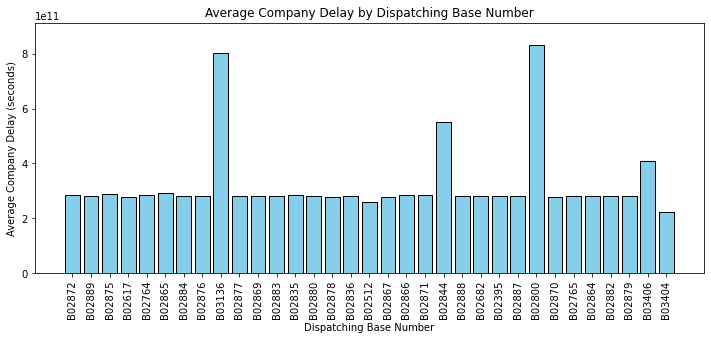

In [0]:
import matplotlib.pyplot as plt

pandas_dispatching_base_delay_df = dispatching_base_delay_df.toPandas()

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bar chart with gaps between bars
ax.bar(pandas_dispatching_base_delay_df["dispatching_base_num"], pandas_dispatching_base_delay_df["avg_company_delay"],
       color="skyblue", edgecolor="black")
ax.set_title("Average Company Delay by Dispatching Base Number")
ax.set_xlabel("Dispatching Base Number")
ax.set_ylabel("Average Company Delay (seconds)")
ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(bottom=0.3)
ax.margins(y=0.1)
plt.show()


### Customer delay
#### -> Lets see the delay between the driver arrival and the time the ride has actually started.
- Hour wise
- Dispatching Base Number

In [0]:
from pyspark.sql.functions import col, expr

hourly_customer_delay_df = df.withColumn("customer_delay", expr("pickup_datetime - on_scene_datetime")) \
    .groupBy(hour("pickup_datetime").alias("hour")) \
    .agg(avg("customer_delay").alias("avg_customer_delay"))

hourly_customer_delay_df.show()


+----+--------------------+
|hour|  avg_customer_delay|
+----+--------------------+
|  12|INTERVAL '0 00:00...|
|  22|INTERVAL '0 00:01...|
|   1|INTERVAL '0 00:01...|
|  13|INTERVAL '0 00:00...|
|  16|INTERVAL '0 00:00...|
|   6|INTERVAL '0 00:01...|
|  20|INTERVAL '0 00:01...|
|   5|INTERVAL '0 00:01...|
|  19|INTERVAL '0 00:01...|
|  15|INTERVAL '0 00:00...|
|   9|INTERVAL '0 00:01...|
|  17|INTERVAL '0 00:00...|
|   8|INTERVAL '0 00:00...|
|  23|INTERVAL '0 00:01...|
|   7|INTERVAL '0 00:01...|
|  10|INTERVAL '0 00:01...|
|  21|INTERVAL '0 00:01...|
|  11|INTERVAL '0 00:01...|
|  14|INTERVAL '0 00:00...|
|  18|INTERVAL '0 00:00...|
+----+--------------------+
only showing top 20 rows



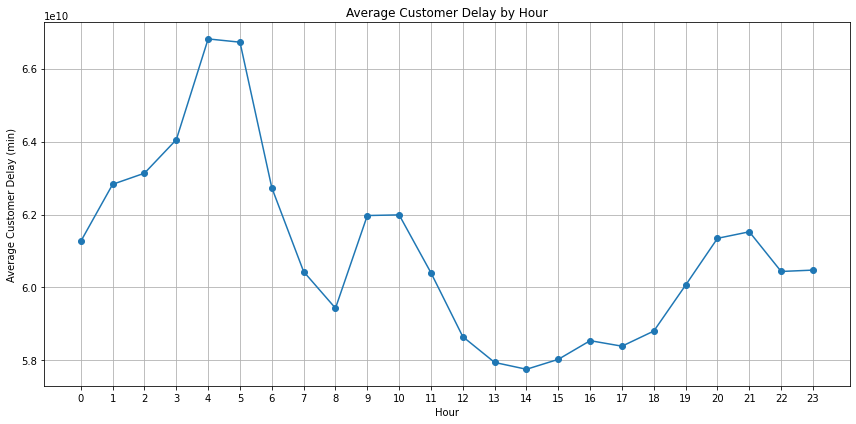

In [0]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas DataFrame
pandas_hourly_customer_delay_df = hourly_customer_delay_df.toPandas()
pandas_hourly_customer_delay_df = pandas_hourly_customer_delay_df.sort_values("hour")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(pandas_hourly_customer_delay_df["hour"], pandas_hourly_customer_delay_df["avg_customer_delay"], marker="o", linestyle="-")
ax.set_title("Average Customer Delay by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Average Customer Delay (min)")
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
ax.grid(True)
plt.tight_layout()
plt.show()


In [0]:
dispatching_base_customer_delay_df = df.withColumn("customer_delay", expr("pickup_datetime - on_scene_datetime")) \
    .groupBy("dispatching_base_num") \
    .agg(avg("customer_delay").alias("avg_customer_delay"))

dispatching_base_customer_delay_df.show()


+--------------------+--------------------+
|dispatching_base_num|  avg_customer_delay|
+--------------------+--------------------+
|              B02872|INTERVAL '0 00:00...|
|              B02889|INTERVAL '0 00:00...|
|              B02875|INTERVAL '0 00:00...|
|              B02617|INTERVAL '0 00:00...|
|              B02764|INTERVAL '0 00:00...|
|              B02865|INTERVAL '0 00:00...|
|              B02884|INTERVAL '0 00:00...|
|              B02876|INTERVAL '0 00:00...|
|              B03136|INTERVAL '0 00:01...|
|              B02877|INTERVAL '0 00:00...|
|              B02869|INTERVAL '0 00:00...|
|              B02883|INTERVAL '0 00:00...|
|              B02835|INTERVAL '0 00:00...|
|              B02880|INTERVAL '0 00:00...|
|              B02878|INTERVAL '0 00:00...|
|              B02836|INTERVAL '0 00:01...|
|              B02512|INTERVAL '0 00:01...|
|              B02867|INTERVAL '0 00:00...|
|              B02866|INTERVAL '0 00:00...|
|              B02871|INTERVAL '

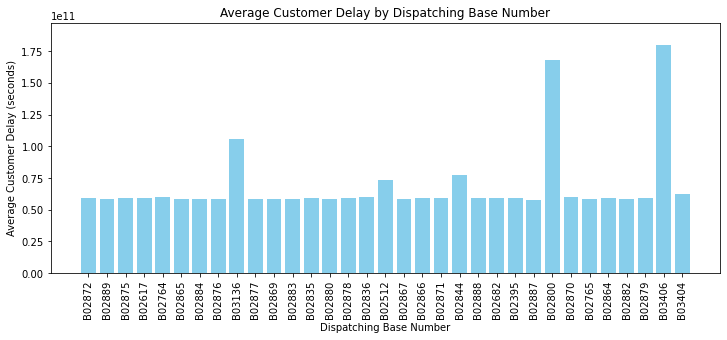

In [0]:
import matplotlib.pyplot as plt

pandas_dispatching_base_customer_delay_df = dispatching_base_customer_delay_df.toPandas()

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bar chart with colorful bars
ax.bar(pandas_dispatching_base_customer_delay_df["dispatching_base_num"], pandas_dispatching_base_customer_delay_df["avg_customer_delay"],
       color=["skyblue"])
ax.set_title("Average Customer Delay by Dispatching Base Number")
ax.set_xlabel("Dispatching Base Number")
ax.set_ylabel("Average Customer Delay (seconds)")
ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(bottom=0.3)
ax.margins(y=0.1)
plt.show()


####  Wheel chair accessible vehicles
- Hour wise
- Dispatching Base wise

In [0]:
wav_hourly_df = df.filter(df["wav_request_flag"] == "Y") \
    .groupBy(hour("request_datetime").alias("hour")) \
    .count()

wav_hourly_df.show()


+----+-----+
|hour|count|
+----+-----+
|  12|22650|
|  22| 5841|
|   1| 2441|
|  13|23083|
|   6| 1927|
|  16|16577|
|   3| 1168|
|  20| 8227|
|   5| 1327|
|  19| 9702|
|  15|19629|
|   9|15610|
|  17|14427|
|   4| 1006|
|   8| 9948|
|  23| 4537|
|   7| 4604|
|  10|18889|
|  21| 7413|
|  11|19986|
+----+-----+
only showing top 20 rows



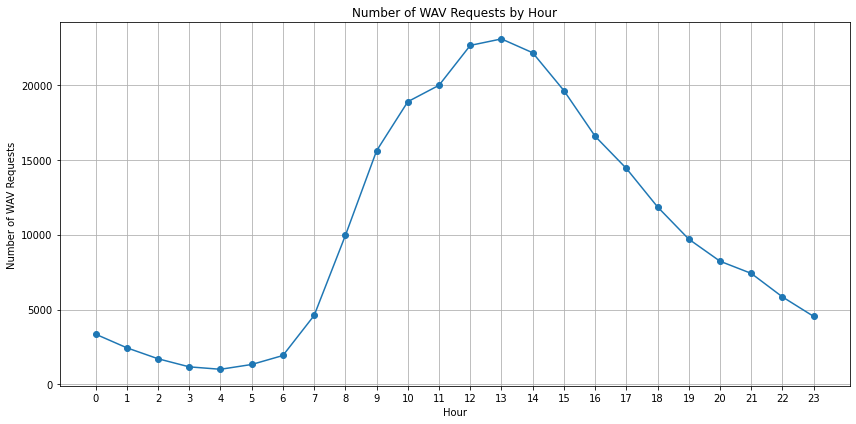

In [0]:
import matplotlib.pyplot as plt

pandas_wav_hourly_df = wav_hourly_df.toPandas()

pandas_wav_hourly_df = pandas_wav_hourly_df.sort_values("hour")

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the line graph
ax.plot(pandas_wav_hourly_df["hour"], pandas_wav_hourly_df["count"], marker="o", linestyle="-")
ax.set_title("Number of WAV Requests by Hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Number of WAV Requests")
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
ax.grid(True)
plt.tight_layout()
plt.show()


In [0]:
wav_dispatching_base_df = df.filter(df["wav_request_flag"] == "Y") \
    .groupBy("dispatching_base_num") \
    .count()

wav_dispatching_base_df.show()


+--------------------+-----+
|dispatching_base_num|count|
+--------------------+-----+
|              B02876| 1412|
|              B03136| 1351|
|              B02869| 1000|
|              B02883|  307|
|              B02835| 4832|
|              B02884| 1642|
|              B02880|   34|
|              B02878|  952|
|              B02836|  913|
|              B02872|41571|
|              B02512|  125|
|              B02867|  170|
|              B02866| 8776|
|              B02871| 9655|
|              B02889|  164|
|              B02844|37747|
|              B02888|   30|
|              B02682|  629|
|              B02395| 2666|
|              B02887|  142|
+--------------------+-----+
only showing top 20 rows



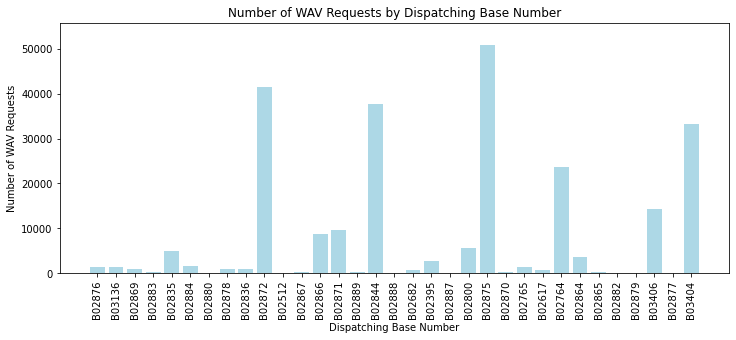

In [0]:
import matplotlib.pyplot as plt

pandas_wav_dispatching_base_df = wav_dispatching_base_df.toPandas()

fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the bar chart with a light color
ax.bar(pandas_wav_dispatching_base_df["dispatching_base_num"], pandas_wav_dispatching_base_df["count"],
       color="lightblue")
ax.set_title("Number of WAV Requests by Dispatching Base Number")
ax.set_xlabel("Dispatching Base Number")
ax.set_ylabel("Number of WAV Requests")
ax.tick_params(axis='x', rotation=90)
plt.subplots_adjust(bottom=0.3)
ax.margins(y=0.1)
plt.show()


### Which base is receiving more ride requests month wise.

In [0]:
from pyspark.sql.functions import month

base_monthly_requests_df = df.groupBy("dispatching_base_num", month("request_datetime").alias("month")) \
    .count() \
    .orderBy("month", "count", ascending=False)

base_monthly_requests_df.show()


+--------------------+-----+--------+
|dispatching_base_num|month|   count|
+--------------------+-----+--------+
|              B03404|   12|11784116|
|              B03406|   12| 4251894|
|              B02764|   12|    7635|
|              B02872|   12|    1386|
|              B02880|   12|     739|
|              B02867|   12|     719|
|              B02878|   12|     713|
|              B02877|   12|     680|
|              B02395|   12|     604|
|              B02882|   12|     548|
|              B02835|   12|     539|
|              B02884|   12|     380|
|              B02864|   12|     360|
|              B02879|   12|     359|
|              B02682|   12|     337|
|              B02870|   12|     317|
|              B02765|   12|     290|
|              B02876|   12|     256|
|              B02888|   12|     229|
|              B02889|   12|     224|
+--------------------+-----+--------+
only showing top 20 rows



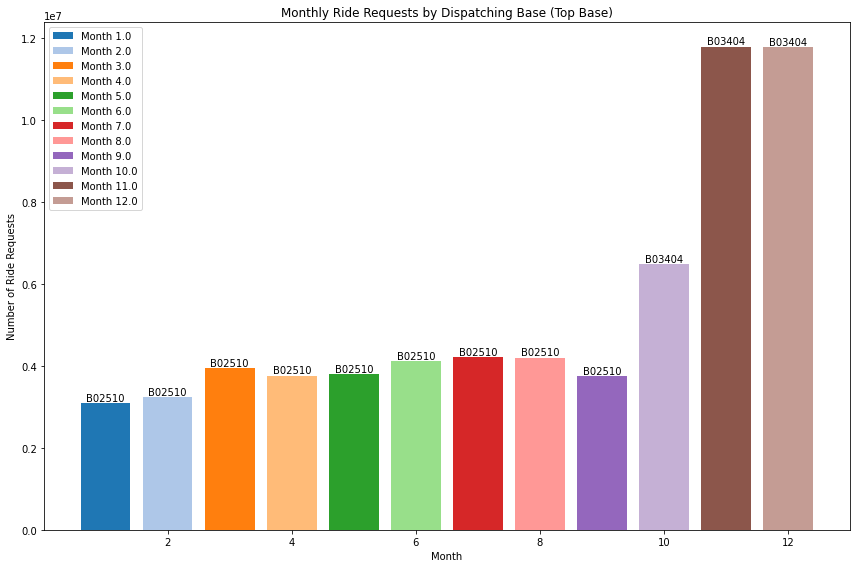

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pandas_base_monthly_requests_df = base_monthly_requests_df.toPandas()

# Group the DataFrame by month and get the base with the maximum count for each month
top_bases_df = pandas_base_monthly_requests_df.loc[pandas_base_monthly_requests_df.groupby('month')['count'].idxmax()]

fig, ax = plt.subplots(figsize=(12, 8))
color_palette = plt.get_cmap('tab20')
for i, month in enumerate(top_bases_df['month']):
    base_count = top_bases_df.loc[top_bases_df['month'] == month, 'count']
    ax.bar(month, base_count, color=color_palette(i), label=f"Month {month}")
ax.set_xlabel('Month')
ax.set_ylabel('Number of Ride Requests')
ax.set_title('Monthly Ride Requests by Dispatching Base (Top Base)')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 10, top_bases_df.iloc[i]['dispatching_base_num'],
            ha='center', va='bottom')
ax.legend()
plt.tight_layout()
plt.show()


### How many passengers are willing to share a ride and how many actually did

In [0]:
from pyspark.sql.functions import col

# Calculating the number of passengers willing to share a ride
passengers_willing_to_share = df.filter(col("shared_request_flag") == "Y").count()

# Calculating the number of passengers who actually shared a ride
passengers_actually_shared = df.filter(col("shared_match_flag") == "Y").count()

print("Number of passengers willing to share a ride:", passengers_willing_to_share)
print("Number of passengers who actually shared a ride:", passengers_actually_shared)


Number of passengers willing to share a ride: 287466
Number of passengers who actually shared a ride: 107080


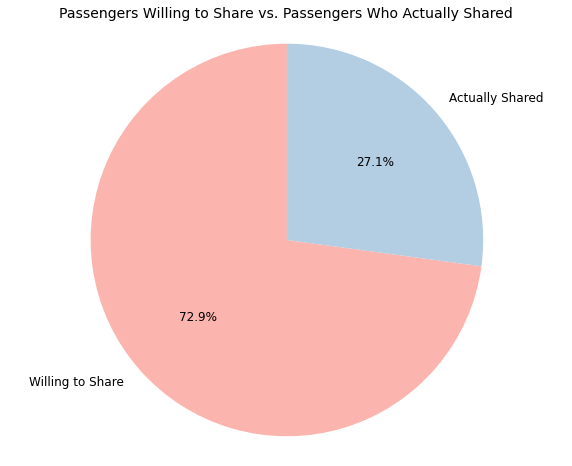

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

labels = ["Willing to Share", "Actually Shared"]
counts = [passengers_willing_to_share, passengers_actually_shared]
color_palette = cm.get_cmap('Pastel1')

# Create the pie chart with larger figure size
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                  startangle=90, colors=color_palette(range(len(labels))))
plt.setp(texts + autotexts, size=12)
ax.set_title("Passengers Willing to Share vs. Passengers Who Actually Shared", fontsize=14)
ax.axis('equal')
plt.show()


In [0]:
from pyspark.sql.functions import col

# Grouping the rows by dispatching base number and willing shared requests flag, and count the number of rows
shared_requests_df = df.groupBy('dispatching_base_num', 'shared_request_flag').count()
willing_shared_requests_df = shared_requests_df.filter(col('shared_request_flag') == 'Y')
willing_shared_requests_df.show()


+--------------------+-------------------+-----+
|dispatching_base_num|shared_request_flag|count|
+--------------------+-------------------+-----+
|              B02864|                  Y|    1|
|              B02882|                  Y|    1|
|              B02875|                  Y|    2|
|              B02800|                  Y|   51|
|              B03136|                  Y|   11|
+--------------------+-------------------+-----+



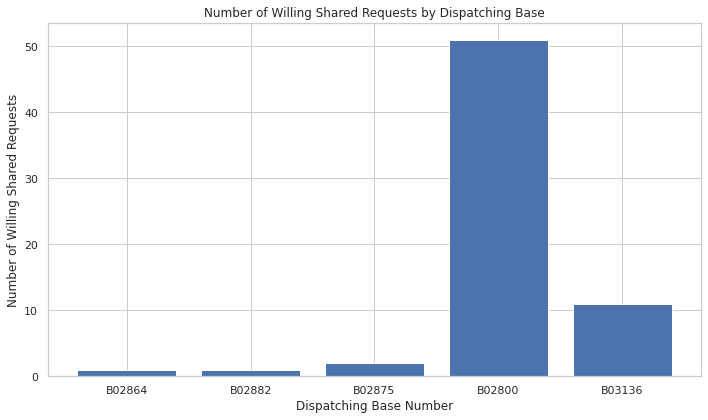

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pandas_willing_shared_requests_df = willing_shared_requests_df.toPandas()

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(pandas_willing_shared_requests_df))
ax.bar(x, pandas_willing_shared_requests_df['count'])
ax.set_xlabel("Dispatching Base Number")
ax.set_ylabel("Number of Willing Shared Requests")
ax.set_title("Number of Willing Shared Requests by Dispatching Base")
ax.set_xticks(x)
ax.set_xticklabels(pandas_willing_shared_requests_df['dispatching_base_num'])

# Show the plot
plt.tight_layout()
plt.show()


### Uber Sales Monthwise and Basewise

In [0]:
from pyspark.sql.functions import expr

# Register the DataFrame as a temporary view to enable SQL queries
df.createOrReplaceTempView("trip_data")

# Calculate Uber earnings month-wise
monthly_earnings_df = spark.sql("""
    SELECT
        month(request_datetime) AS month,
        dispatching_base_num,
        SUM(base_passenger_fare) AS uber_earnings
    FROM
        trip_data
    GROUP BY
        month,
        dispatching_base_num
    ORDER BY
        month
""")

# Display Uber earnings month-wise
monthly_earnings_df.show()

# Calculate Uber earnings base-wise
base_earnings_df = spark.sql("""
    SELECT
        dispatching_base_num,
        SUM(base_passenger_fare) AS uber_earnings
    FROM
        trip_data
    GROUP BY
        dispatching_base_num
    ORDER BY
        dispatching_base_num
""")

# Display Uber earnings base-wise
base_earnings_df.show()


+-----+--------------------+------------------+
|month|dispatching_base_num|     uber_earnings|
+-----+--------------------+------------------+
|    1|              B02875| 648.0699999999999|
|    1|              B02865|426.50000000000006|
|    1|              B02617|            131.88|
|    1|              B02889|            105.66|
|    1|              B02764| 501.4800000000001|
|    1|              B02872|           1678.02|
|    2|              B02884| 388.5199999999999|
|    2|              B02872|            624.02|
|    3|              B02877|395869.78999998735|
|    3|              B02872|1803027.1699997147|
|    3|              B02682| 649493.2899999835|
|    3|              B02871| 636333.4899999851|
|    3|              B02835|   410277.33999999|
|    3|              B02880| 246908.1300000009|
|    3|              B02875|1374359.1299998942|
|    3|              B02887| 663328.4699999817|
|    3|              B02764| 2149364.759999749|
|    3|              B02865|165102.12000

In [0]:
from pyspark.sql.functions import expr

# Registering the DataFrame as a temporary view to enable SQL queries
df.createOrReplaceTempView("trip_data")

# Calculating Uber earnings month-wise
monthly_earnings_df = spark.sql("""
    SELECT
        month(request_datetime) AS month,
        SUM(base_passenger_fare) AS uber_earnings
    FROM
        trip_data
    GROUP BY
        month
    ORDER BY
        month
""")
monthly_earnings_df.show()

# Calculating Uber earnings base-wise
base_earnings_df = spark.sql("""
    SELECT
        dispatching_base_num,
        SUM(base_passenger_fare) AS uber_earnings
    FROM
        trip_data
    GROUP BY
        dispatching_base_num
    ORDER BY
        dispatching_base_num
""")
base_earnings_df.show()


+-----+--------------------+
|month|       uber_earnings|
+-----+--------------------+
|    1|   3491.609999999998|
|    2|  1012.5399999999998|
|    3|1.7147941430002846E7|
|    4| 2.126071425180407E8|
|    5|2.4144038102834028E8|
|    6|  2.55708450498532E8|
|    7| 2.519170059087762E8|
|    8|2.3821515474874747E8|
|    9|2.5582470162789068E8|
|   10|2.7214667984768724E8|
|   11| 2.684717123873246E8|
|   12|2.6259905596668172E8|
+-----+--------------------+

+--------------------+--------------------+
|dispatching_base_num|       uber_earnings|
+--------------------+--------------------+
|              B02395| 1.898706082000082E7|
|              B02512|   7090690.789999982|
|              B02617| 4.891611363001728E7|
|              B02682| 6.062687041002027E7|
|              B02764|2.0755045322997943E8|
|              B02765|1.0550730521002062E8|
|              B02800|   86155.80000000016|
|              B02835| 3.800074497001058E7|
|              B02836| 2.540152344000359E7|
|      

#### Month wise sales

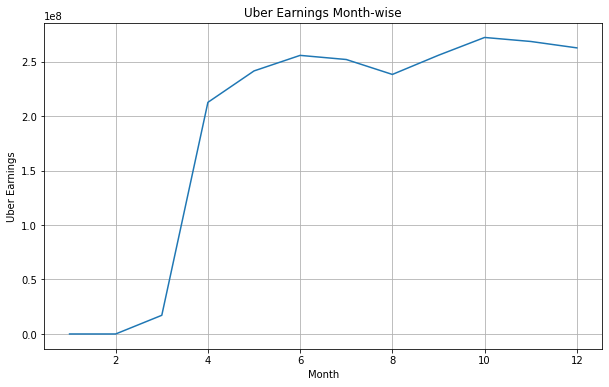

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the monthly_earnings_df DataFrame to Pandas for visualization
pandas_monthly_earnings_df = monthly_earnings_df.toPandas()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the line graph
plt.plot(pandas_monthly_earnings_df["month"], pandas_monthly_earnings_df["uber_earnings"])

# Setting x and y labels
plt.xlabel("Month")
plt.ylabel("Uber Earnings")

# Setting the plot title
plt.title("Uber Earnings Month-wise")

# Add grid lines
plt.grid(True)

# Showing the plot
plt.show()


#### Basewise Sales

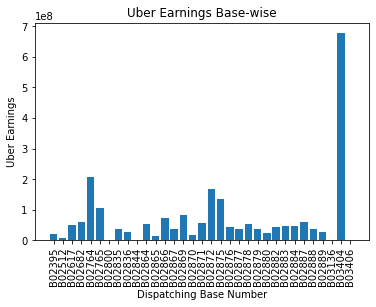

In [0]:
# Convert the base_earnings_df DataFrame to Pandas for visualization
pandas_base_earnings_df = base_earnings_df.toPandas()

# Plotting the bar graph
plt.bar(pandas_base_earnings_df["dispatching_base_num"], pandas_base_earnings_df["uber_earnings"])

# Setting x and y labels
plt.xlabel("Dispatching Base Number")
plt.ylabel("Uber Earnings")

# Setting the plot title
plt.title("Uber Earnings Base-wise")

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)

# Showing the plot
plt.show()


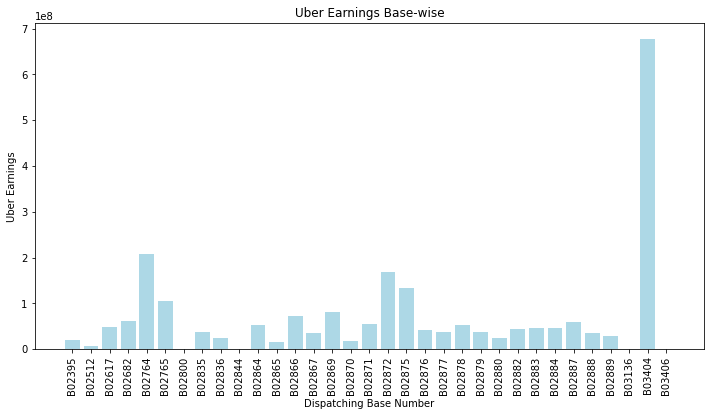

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the base_earnings_df DataFrame to Pandas for visualization
pandas_base_earnings_df = base_earnings_df.toPandas()

# Set the figure size
plt.figure(figsize=(12, 6))

# Define a light color for the bars
color = 'lightblue'

# Plotting the bar graph with the specified color
plt.bar(pandas_base_earnings_df["dispatching_base_num"], pandas_base_earnings_df["uber_earnings"], color=color)

# Setting x and y labels
plt.xlabel("Dispatching Base Number")
plt.ylabel("Uber Earnings")

# Setting the plot title
plt.title("Uber Earnings Base-wise")

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)

# Showing the plot
plt.show()
